<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/01_supervised/classification/customer_churn_prediction/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Customer-Churn.csv to Customer-Churn (4).csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupp

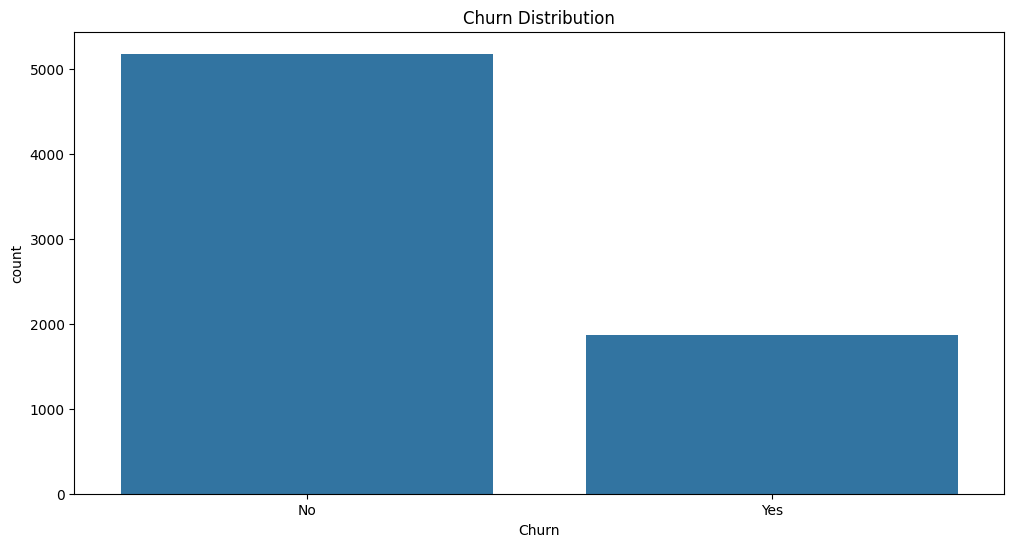

In [9]:
from google.colab import files
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file
files.upload()  # This command allows you to upload the file.
os.listdir('/content/')

# For example, load a CSV file
df = pd.read_csv('/content/Customer-Churn.csv')

# Inspect the data
print(df.head())
print(df.info())
print(df.describe())

# Missing value analysis
print(df.isnull().sum())

# Visualize the distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Convert Churn variable to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'report': report,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(report)


Logistic Regression Results:
Accuracy: 0.8088
ROC AUC: 0.8567
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113


Random Forest Results:
Accuracy: 0.7913
ROC AUC: 0.8383
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113


Gradient Boosting Results:
Accuracy: 0.8017
ROC AUC: 0.8572
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

 

In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter optimization for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict using the optimized model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Score:  0.8383513991491982
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.70      0.49      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

